# Лабораторна робота №13

## Завдання 1

1. Поновити код і результати про класифікацію квіток ірису.
2. Діючи за аналогією, розв’язати задачу класифікації заданих об’єктів:
    1. За допомогою функції load_wine завантажити із сховища sklearn дані.
    2. Описати ці дані і сформулювати для них задачу класифікації
    3. Візуалізувати дані. Звернути увагу на якість отриманих картинок, що можна досягнути зміною параметрів функції, що будує відповіді об’єкти.
    4. За допомогою методу k-means провести навчання моделі класифіка-
ції. Змінюючи кількість найближчих сусідів, оптимізувати якість моделі класифікації.

In [124]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

wines = load_wine(as_frame=True)
wines.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [125]:
# wines.feature_names
# wines.target_names
# wines.frame
# wines.frame.info()
# wines.data.columns

wines.frame.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [126]:
Класи вин

SyntaxError: invalid syntax (2181813625.py, line 1)

In [ ]:
wines['target'].unique()

array([0, 1, 2])

In [ ]:
Згрупуємо вина по класам

In [ ]:
wines_by_class = []
wine_classes = wines['target'].unique()
for target in wine_classes:
    wine_class = wines.frame.loc[wines.frame['target'] == target]
    wines_by_class.append(wine_class)


In [ ]:
wines_by_class[2].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2


## Візуалізація

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [ ]:
feature_names = wines.feature_names
features_number = len(wines.data.columns)

In [ ]:

def color_sequence():
    colors = mcolors.BASE_COLORS.keys()
    for color in colors:
        yield color 

In [ ]:
def to_short_name(val:str):
    parts = val.split('_')
    result = parts[0]
    if len(result) >= 10:
        return result[:6] + '...'
    return result

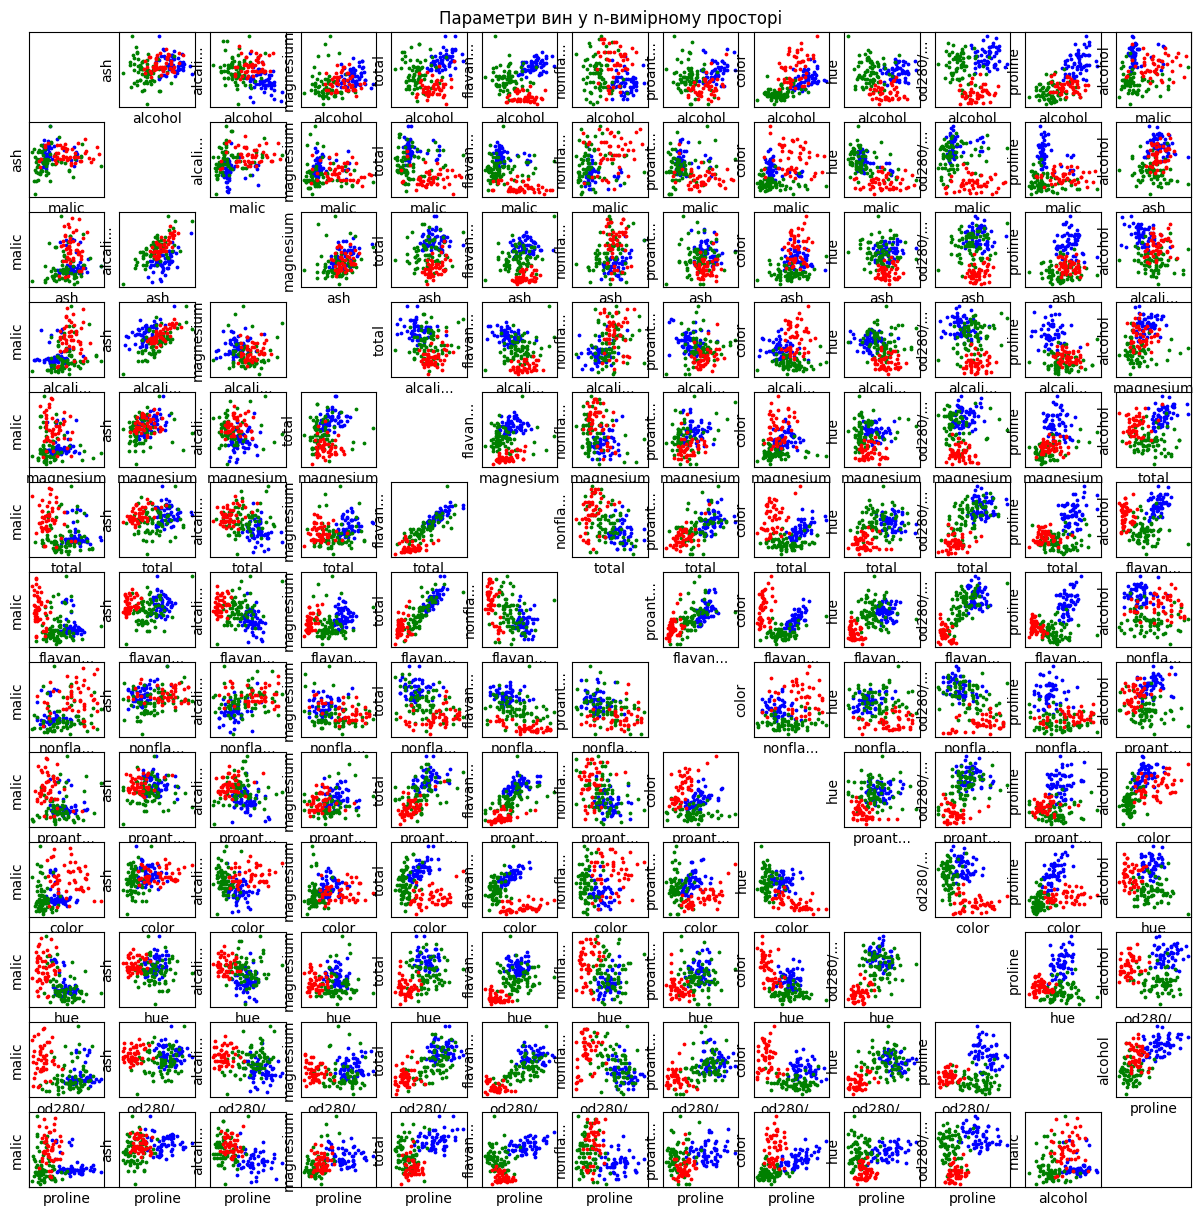

In [ ]:
fig = plt.figure(figsize=[15, 15])
plt.xticks([])
plt.yticks([])
plt.title('Параметри вин у n-вимірному просторі')

for i in range(features_number):
    for j in range(features_number):
        if i == j:
            continue

        ax = fig.add_subplot(features_number, features_number, n)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(to_short_name(feature_names[i]), labelpad=0)
        ax.set_ylabel(to_short_name(feature_names[j]), labelpad=0)


        colors = color_sequence()
    
        for wine_class in wines_by_class:
            target_color = next(colors)
            n = i*features_number + j + 1
            
            ax.scatter(
                wine_class.iloc[:, i], wine_class.iloc[:, j], 
                c = target_color,
                s = 3,
            )


## KNeighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = wines.frame.drop('target', axis = 1)
y = wines.frame['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We should normalize the data after splitting it into training and test sets. This is to prevent ‘data leakage’ as the normalization would give the model additional information about the test set if we normalized all the data at once.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
print(confusion_matrix(y_test, pred_knn))

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


### KNeighbours Classifier with Cross Validation    

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


Text(0, 0.5, 'Accuracy Score')

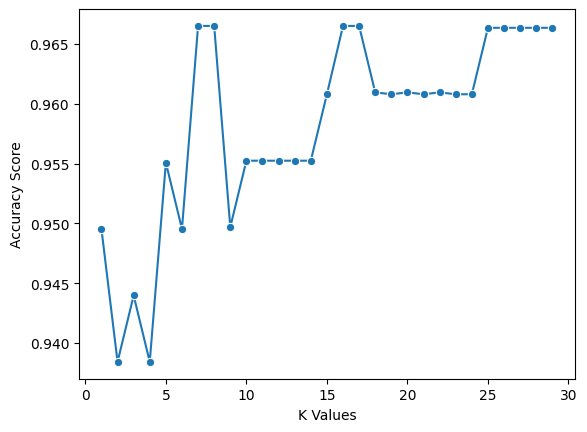

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

k_values = [i for i in range (1,30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [138]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.9444444444444444
